In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("train_AV3.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.shape

(614, 13)

In [9]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [10]:
gender = df[pd.notnull(df["Gender"])] 
gender["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
def preprocessing_train(df):
    df["Gender"].fillna("Male", inplace = True)
    df["Married"].fillna( method ='ffill', inplace = True)
    df["Dependents"].fillna( method ='ffill', inplace = True)
    df["Self_Employed"].fillna( method ='ffill', inplace = True)
    df["LoanAmount"].fillna(df["LoanAmount"].mean() , inplace = True)
    df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean() , inplace = True)
    df["Credit_History"].fillna( df["Credit_History"].mean(), inplace = True)
    
    le_gender = LabelEncoder()
    le_married = LabelEncoder()
    le_education = LabelEncoder()
    le_self_employed = LabelEncoder()
    le_property_area = LabelEncoder()
    le_loan_status = LabelEncoder()
    le_dependents = LabelEncoder()
    
    df['Gender_n'] = le_gender.fit_transform(df['Gender'])
    df['Married_n'] = le_married.fit_transform(df['Married'])
    df['Dependents_n'] = le_loan_status.fit_transform(df['Dependents'])
    df['Education_n'] = le_education.fit_transform(df['Education'])
    df['Self_Employed_n'] = le_self_employed.fit_transform(df['Self_Employed'])
    df['Property_Area_n'] = le_property_area.fit_transform(df['Property_Area'])
    df['Loan_Status_n'] = le_loan_status.fit_transform(df['Loan_Status'])
    
    df = df.drop(columns=['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents'])
    X = df.drop(columns=["Loan_Status_n"])
    y = df["Loan_Status_n"]
    return X, y

In [12]:
# x = df[df["Gender"] == "Male"]["LoanAmount"].fillna(value=150.861) 

In [13]:
# x.head()

In [14]:
# df[df["Gender"] == "Male"]["LoanAmount"].shape

In [15]:
# x.shape

In [16]:
# for i in range(len(df[df["Gender"] == "Male"])):
#     df[df["Gender"] == "Male"]["Loan"] = x


In [17]:
# df[df["Gender"] == "Male"]["LoanAmount"].fillna(value=150.861, inplace=True)

In [18]:
# # df[df["Gender"] == "Male"]["LoanAmount"] == pd.NA
# pd.isna(df[df["Gender"] == "Male"]["LoanAmount"])

### SVM

In [19]:
def svm(X_train, y_train):
    model = SVC(kernel='linear') # Linear Kernel
    model.fit(X_train, y_train)
    return model

### Logistic Regression

In [20]:
def lr(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

### K Nearest Neighbour


In [21]:
def knn(X_train, y_train, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    return model

### Decision Tree

In [22]:
def decision_tree(X_train, y_train):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train,y_train)
    return model

### Random Forest

In [23]:
def random_forest(X_train, y_train, n_estimators):
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    return model

### Predict Function

In [24]:
def pred(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

### Accuracy Function

In [34]:
def accuracy(y_test, y_pred):
    print("Accuracy : ")
    print(metrics.accuracy_score(y_test, y_pred.round()))
    print()
    print("###############################################")
    print()
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred.round()))
    print()
    print("###############################################")
    print()
    print("Classification Report")
    print(classification_report(y_test,y_pred.round()))
    print()
    print()
    print()
    print()

### Error Function

In [26]:
def error(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Ewrror:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Seaching optimal k

In [27]:
def plot_for_k(X, y):
    
    accuracy_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        score=cross_val_score(knn,X,y,cv=10)
        accuracy_rate.append(score.mean())
        
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

### Testing k 

In [28]:
def check_k(X_train, y_train, X_test, y_test, k):
    # NOW WITH K=k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K=2')
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))

#### Preprocessing Fn Call

In [29]:
X, y = preprocessing_train(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 20% test

#### Ploting graph for k range from 1 to 40

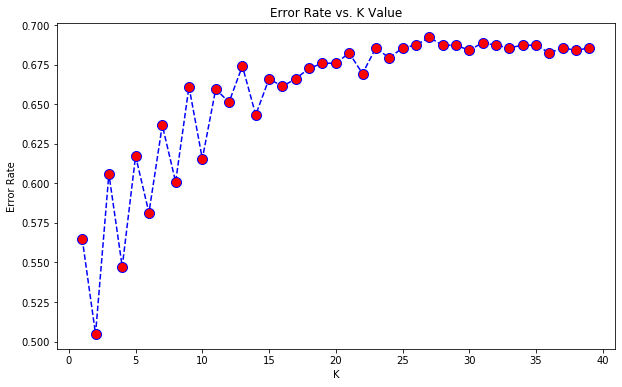

In [30]:
plot_for_k(X, y)

#### Creating and Fitting Model

In [31]:
svm_model = svm(X_train, y_train)
lr_model = lr(X_train, y_train)
knn_model = knn(X_train, y_train, 22)
decision_tree_model = decision_tree(X_train, y_train)
random_forest_model = random_forest(X_train, y_train, 20)

/home/sarvesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Predicting for X_test

In [32]:
y_hat_svm = pred(svm_model, X_test)
y_hat_lr = pred(lr_model, X_test)
y_hat_knn = pred(knn_model, X_test)
y_hat_dt = pred(decision_tree_model, X_test)
y_hat_rf = pred(random_forest_model, X_test)

#### Checking Accuracy for models

In [35]:
#SVM
print("Support Vector Machine : ")
print()
accuracy(y_test, y_hat_svm)

#Logistic Regression
print("Logistic Regression : ")
print()
accuracy(y_test, y_hat_lr)

#K Nearest Neighbors
print("K Nearest Neighbors : ")
print()
accuracy(y_test, y_hat_knn)

#Decision Tree
print("Decision Tree : ")
print()
accuracy(y_test, y_hat_dt)

#Random Forest
print("Random Forest : ")
print()
accuracy(y_test, y_hat_rf)

Support Vector Machine : 

Accuracy : 
0.8130081300813008

###############################################

Confusion Matrix
[[19 21]
 [ 2 81]]

###############################################

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        40
           1       0.79      0.98      0.88        83

    accuracy                           0.81       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.81      0.79       123





Logistic Regression : 

Accuracy : 
0.8130081300813008

###############################################

Confusion Matrix
[[19 21]
 [ 2 81]]

###############################################

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        40
           1       0.79      0.98      0.88        83

    accuracy                           0.81       123
   macro avg       0.8

### Checking Error

In [37]:
#SVM
print("Support Vector Machine : ")
print()
error(y_test, y_hat_svm)

#Logistic Regression
print("Logistic Regression : ")
print()
error(y_test, y_hat_lr)

#K Nearest Neighbors
print("K Nearest Neighbors : ")
print()
error(y_test, y_hat_knn)

#Decision Tree
print("Decision Tree : ")
print()
error(y_test, y_hat_dt)

#Random Forest
print("Random Forest : ")
print()
error(y_test, y_hat_rf)


Support Vector Machine : 

Mean Absolute Error: 0.18699186991869918
Mean Squared Ewrror: 0.18699186991869918
Root Mean Squared Error: 0.4324255657551935
Logistic Regression : 

Mean Absolute Error: 0.18699186991869918
Mean Squared Ewrror: 0.18699186991869918
Root Mean Squared Error: 0.4324255657551935
K Nearest Neighbors : 

Mean Absolute Error: 0.3089430894308943
Mean Squared Ewrror: 0.3089430894308943
Root Mean Squared Error: 0.5558264921995841
Decision Tree : 

Mean Absolute Error: 0.2764227642276423
Mean Squared Ewrror: 0.2764227642276423
Root Mean Squared Error: 0.5257592264788534
Random Forest : 

Mean Absolute Error: 0.26666666666666666
Mean Squared Ewrror: 0.1471951219512195
Root Mean Squared Error: 0.3836601646655794


## So I got k =22 is most optimal

# Test Data

In [38]:
test_dataset =pd.read_csv("test_AV3.csv")

In [39]:
test_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [40]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [41]:
test_dataset.shape

(367, 13)

In [42]:
def preprocessing_test(df):
    
    df["Gender"].fillna(method="ffill", inplace = True)
    df["Married"].fillna( method ='ffill', inplace = True)
    df["Dependents"].fillna( method ='ffill', inplace = True)
    df["Self_Employed"].fillna( method ='ffill', inplace = True)
    df["LoanAmount"].fillna(df["LoanAmount"].mean() , inplace = True)
    df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean() , inplace = True)
    df["Credit_History"].fillna( df["Credit_History"].mean(), inplace = True)
    
    le_gender = LabelEncoder()
    le_married = LabelEncoder()
    le_education = LabelEncoder()
    le_self_employed = LabelEncoder()
    le_property_area = LabelEncoder()
    le_loan_status = LabelEncoder()
    le_dependents = LabelEncoder()
    
    df['Gender_n'] = le_gender.fit_transform(df['Gender'])
    df['Married_n'] = le_married.fit_transform(df['Married'])
    df['Dependents_n'] = le_loan_status.fit_transform(df['Dependents'])
    df['Education_n'] = le_education.fit_transform(df['Education'])
    df['Self_Employed_n'] = le_self_employed.fit_transform(df['Self_Employed'])
    df['Property_Area_n'] = le_property_area.fit_transform(df['Property_Area'])
    df['Loan_Status_n'] = le_loan_status.fit_transform(df['Loan_Status'])
    
    df = df.drop(columns=["Loan_ID",'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents'])
    X = df.drop(columns=["Loan_Status_n"])
    y = df["Loan_Status_n"]
    
    return X, y
    

In [43]:
X_testing, y_testing = preprocessing_test(test_dataset)

In [44]:
y_hat_test_svm = pred(svm_model, X_testing)
y_hat_test_lr = pred(lr_model, X_testing)
y_hat_test_knn = pred(knn_model, X_testing)
y_hat_test_dt = pred(decision_tree_model, X_testing)
y_hat_test_rf = pred(random_forest_model, X_testing)

In [45]:
#SVM
print("Support Vector Machinet : ")
accuracy(y_testing, y_hat_test_svm)

#Logistic Regression
print("Logistic Regressiont : ")
accuracy(y_testing, y_hat_test_lr)

#K Nearest Neighbors
print("K Nearest Neighborst : ")
accuracy(y_testing, y_hat_test_knn)

#Decision Tree
print("Decision Treet : ")
accuracy(y_testing, y_hat_test_dt)

#Random Forest
print("Random Forest : ")
print()
accuracy(y_testing, y_hat_test_rf)

Support Vector Machinet : 
Accuracy : 
0.9782016348773842

###############################################

Confusion Matrix
[[ 56   2]
 [  6 303]]

###############################################

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        58
           1       0.99      0.98      0.99       309

    accuracy                           0.98       367
   macro avg       0.95      0.97      0.96       367
weighted avg       0.98      0.98      0.98       367





Logistic Regressiont : 
Accuracy : 
0.989100817438692

###############################################

Confusion Matrix
[[ 58   0]
 [  4 305]]

###############################################

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.99      0.99       309

    accuracy                           0.99       367
   macro avg   

In [47]:
#SVM
print("Support Vector Machine : ")
print()
error(y_testing, y_hat_test_svm)

#Logistic Regression
print("Logistic Regression : ")
print()
error(y_testing, y_hat_test_lr)

#K Nearest Neighbors
print("K Nearest Neighbors : ")
print()
error(y_testing, y_hat_test_knn)

#Decision Tree
print("Decision Tree : ")
print()
error(y_testing, y_hat_test_dt)

#Random Forest
print("Random Forest : ")
print()
error(y_testing, y_hat_test_rf)


Support Vector Machine : 

Mean Absolute Error: 0.021798365122615803
Mean Squared Ewrror: 0.021798365122615803
Root Mean Squared Error: 0.14764269410511244
Logistic Regression : 

Mean Absolute Error: 0.010899182561307902
Mean Squared Ewrror: 0.010899182561307902
Root Mean Squared Error: 0.10439915019437611
K Nearest Neighbors : 

Mean Absolute Error: 0.1771117166212534
Mean Squared Ewrror: 0.1771117166212534
Root Mean Squared Error: 0.42084642878519646
Decision Tree : 

Mean Absolute Error: 0.18528610354223432
Mean Squared Ewrror: 0.18528610354223432
Root Mean Squared Error: 0.4304487234761352
Random Forest : 

Mean Absolute Error: 0.19482288828337874
Mean Squared Ewrror: 0.06713896457765668
Root Mean Squared Error: 0.2591118765661981
